In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Matplotlib Tutorial - PART 2

**Ref: [Matplotlib Tutorials](https://youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_) by [Corey Schafer](https://coreyms.com/)**

### Load `matplotlib` library

In [2]:
import matplotlib

print("Matplotlib version: ", matplotlib.__version__)

Matplotlib version:  3.4.3


<IPython.core.display.Javascript object>

### Bar Chart

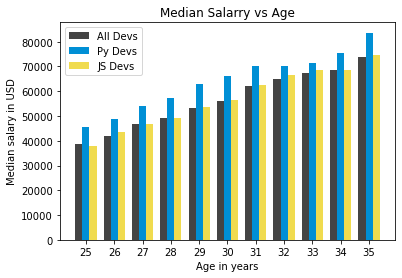

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
import numpy as np

age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
sal_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]  # All devs salary
py_sal_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]  # Python devs salary
js_sal_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]  # JS devs salary

age_idx = np.arange(len(age_x))
bar_width = 0.25

# All developers plot.
plt.bar(age_idx - bar_width, sal_y, width=bar_width, color="#444444", label="All Devs")

# Python developers plot.
plt.bar(age_idx, py_sal_y, width=bar_width, color="#008FD5", label="Py Devs")

# Javascript developers plot.
plt.bar(age_idx + bar_width, js_sal_y, width=bar_width, color="#F0DB4F", label="JS Devs")

plt.xlabel("Age in years")
plt.ylabel("Median salary in USD")
plt.title("Median Salarry vs Age")
plt.xticks(ticks=age_idx, labels=age_x)
plt.legend()

plt.show()

### Load sample data using `pandas` library

In [13]:
import pandas as pd

df = pd.read_csv("./data.csv", index_col="Responder_id")

rows, cols = df.shape

print("Number of rows:", rows)
print("Number of columns:", cols)

df.head(3)

Number of rows: 87569
Number of columns: 1


,LanguagesWorkedWith
Responder_id,
1,HTML/CSS;Java;JavaScript;Python
2,C++;HTML/CSS;Python
3,HTML/CSS


<IPython.core.display.Javascript object>

In [14]:
df.value_counts()

LanguagesWorkedWith                                                                     
HTML/CSS;JavaScript;PHP;SQL                                                                 1483
C#;HTML/CSS;JavaScript;SQL                                                                  1414
HTML/CSS;JavaScript                                                                         1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        990
Java                                                                                         934
                                                                                            ... 
Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScript;PHP;Python;TypeScript                        1
Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScript;PHP;Ruby                                     1
Bash/Shell/PowerShell;Clojure;HTML/CSS;JavaScript;PHP;Ruby;Rust;SQL;TypeScript;Other(s):       1
Bash/Shell/PowerShell;Clojure;HTML/CSS

<IPython.core.display.Javascript object>